In [1]:
import pandas as pd
import  re
from  sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Data importing & pre-processing 

In [2]:
data=pd.read_csv('spam_ham_dataset.csv')
data.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [38]:
data.shape

(5171, 3)

In [3]:
data.drop(['Unnamed: 0','label'],axis='columns',inplace=True)

In [4]:
data.groupby('label_num').count()
# 0- not spam
# 1-spam

,text
label_num,
0,3672
1,1499


C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_num', ylabel='count'>

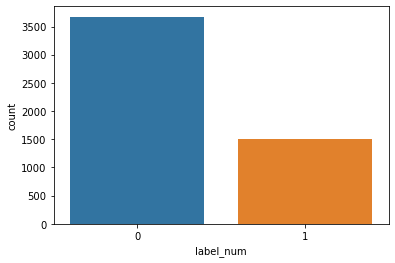

In [7]:
sb.countplot(data['label_num'],)

In [9]:
data['text'][0] 

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [10]:
data['text'][7]
# spam mail

'Subject: looking for medication ? we ` re the best source .\r\nit is difficult to make our material condition better by the best law , but it is easy enough to ruin it by bad laws .\r\nexcuse me . . . : ) you just found the\r\nbest and simpliest site for\r\nmedication on the net . no perscription , easy\r\ndelivery .\r\nprivate , secure , and easy .\r\nbetter see rightly on a pound a week than squint on a million .\r\nwe ` ve got\r\nanything that you will ever want .\r\nerection treatment pills , anti - depressant pills , weight loss , and\r\nmore ! http : / / splicings . bombahakcx . com / 3 /\r\nknowledge and human power are synonymous .\r\nonly high - quality stuff for low rates !\r\n100 % moneyback guarantee !\r\nthere is no god , nature sufficeth unto herself in no wise hath she need of an author .'

Since our mail has many unwanted elements like subject ,\r etc.  we need to clean the text  

In [11]:
data.isna().sum()

text         0
label_num    0
dtype: int64

We don't hae any null values good to go

### cleaning the mails 

In [12]:
def clean(text):
    text=text.replace('Subject:','')
    text=text.replace('\r',' ')
    text=text.replace('\n',' ')
    text=text.replace('#',' ')
    return text

In [13]:
data['clean_text']=data['text'].apply(clean)

In [14]:
data.head()

,text,label_num,clean_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol ; meter : 988291 this is a ...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"hpl nom for january 9 , 2001 ( see attached ..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"neon retreat ho ho ho , we ' re around to th..."
3,"Subject: photoshop , windows , office . cheap ...",1,"photoshop , windows , office . cheap . main t..."
4,Subject: re : indian springs\r\nthis deal is t...,0,re : indian springs this deal is to book the...


#### checking

In [15]:

data['clean_text'][0] 

" enron methanol ; meter   : 988291  this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary  flow data provided by daren } .  please override pop ' s daily volume { presently zero } to reflect daily  activity you can obtain from gas control .  this change is needed asap for economics purposes ."

In [16]:
data['clean_text'][7] 

' looking for medication ? we ` re the best source .  it is difficult to make our material condition better by the best law , but it is easy enough to ruin it by bad laws .  excuse me . . . : ) you just found the  best and simpliest site for  medication on the net . no perscription , easy  delivery .  private , secure , and easy .  better see rightly on a pound a week than squint on a million .  we ` ve got  anything that you will ever want .  erection treatment pills , anti - depressant pills , weight loss , and  more ! http : / / splicings . bombahakcx . com / 3 /  knowledge and human power are synonymous .  only high - quality stuff for low rates !  100 % moneyback guarantee !  there is no god , nature sufficeth unto herself in no wise hath she need of an author .'

### Data splitting 

In [17]:
x_train,x_test,y_train,y_test =train_test_split(data['clean_text'],data['label_num'],test_size=0.3,random_state=42)

In [18]:
len(x_train)

3619

In [19]:
len(x_test)

1552

In [20]:
y_train.head(10)

1023    0
4586    1
2955    0
2495    0
3353    0
1569    0
2210    1
809     0
3058    0
978     0
Name: label_num, dtype: int64

### Encoding the Messages(string values)

In [21]:

converter=CountVectorizer()

In [22]:
# we need to convert xtrain and x_test into numbers using CountVectorizer
x_train_converted=converter.fit_transform(x_train)

In [23]:
x_train_converted.toarray()

array([[2, 0, 0, ..., 0, 0, 0],
       [1, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
x_test_converted=converter.transform(x_test)

In [25]:
x_test_converted.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Algorithms

In [26]:

model_knn=KNeighborsClassifier(n_neighbors=5)
model_svc=SVC()

In [27]:
# Train the models using x_train_converted
model_knn.fit(x_train_converted,y_train)
model_svc.fit(x_train_converted,y_train)

SVC()

### SVC

In [28]:
model_svc.score(x_test_converted,y_test)

0.9684278350515464

### KNN

In [29]:
model_knn.score(x_test_converted,y_test)

0.8472938144329897

since SVM model has highest accuracy we'll continue with svm model

In [30]:
pred=model_svc.predict(x_test_converted)

### Confusion matrix

In [33]:

cm=confusion_matrix(y_test,pred)
cm

array([[1088,   33],
       [  16,  415]], dtype=int64)

Text(0.5, 15.0, 'predicted')

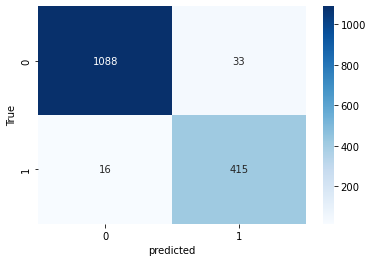

In [36]:
sb.heatmap(cm,annot=True,cmap='Blues',fmt='g')
plt.ylabel('True')
plt.xlabel('predicted')

1- SPAM  
0- NOT SPAM